<a href="https://colab.research.google.com/github/MAZYAFAI/Forex-currency-predictor-uh/blob/main/Autots_Model_Building_and_Finetuning_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 9.9 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached websockets-15.0.1-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 7.0 MB/s eta 0:00:00a 0:00:01
Using cached websockets-15.0.1-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (182 kB)
  Created wheel for peewee: filename=peewee-3.18.2-cp312-cp312-linux_x86_64.whl size=303906 sha256=422ceac922fdb46f798f2ab2f30e879e84d168fee27ff8721b12bfca99373456
  Stored in directory: /home/furkhan67/.cache/pip/wheels/d1/df/a9/0202b051c65b11c992dd6db9f2babdd2c44ec7d35d511be5d3
Successfully built peewee


In [ ]:
!pip install autots

  Using cached autots-0.6.21-py3-none-any.whl.metadata (11 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached autots-0.6.21-py3-none-any.whl (974 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 7.2 MB/s eta 0:00:00 0:00:01
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)


In [ ]:
from autots import AutoTS
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import yfinance as yf

In [ ]:
# Loading the data
data = pd.read_csv('df_Prophet_Autots (1).csv', parse_dates=['Time Serie'], index_col='Time Serie')
data.head()

,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
Time Serie,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,1128.0,...,1.6563,7.3290,101.70,3.8,7.964,8.4430,72.30,1.5808,31.38,36.97
2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,1122.5,...,1.6535,7.2180,103.09,3.8,7.934,8.3600,72.65,1.5565,30.60,37.13
2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,1135.0,...,1.6560,7.2080,103.77,3.8,7.935,8.3530,72.95,1.5526,30.80,37.10
2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,1146.5,...,1.6655,7.2125,105.19,3.8,7.940,8.3675,72.95,1.5540,31.75,37.62
2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,1138.0,...,1.6625,7.2285,105.17,3.8,7.966,8.4150,73.15,1.5623,30.85,37.30


In [ ]:
# 2. Split into train/test (last 60 observations as test set)
test_data = data.iloc[-60:]  # Last 60 rows
train_data = data.iloc[:-60]  # All rows except last 60

In [ ]:
model = AutoTS(
    forecast_length=60,
    frequency='infer',
    ensemble='simple',
    max_generations=5,
    num_validations=3
)
model = model.fit(train_data)

In [ ]:
# 4. Generate forecasts
prediction = model.predict()
forecast = prediction.forecast

In [ ]:
forecast.index = test_data.index

In [ ]:
# 5. Compare forecast with actual test data
print("Forecasted values:")
forecast.head()


In [ ]:
print("\nActual test values:")
test_data.head()

In [ ]:
# Initialize model with 60-day forecast
model = AutoTS(
    forecast_length=60,
    frequency='infer',  # Automatically detects time frequency
    ensemble='simple',
    max_generations=5,  # Increase for better accuracy (slower)
    num_validations=3   # Increase for more robust validation
)

# Fit model directly on DataFrame (date index + currency columns)
model = model.fit(data)

# Generate forecasts
prediction = model.predict()
forecast = prediction.forecast

Using 4 cpus for n_jobs.
Data frequency is: B, used frequency is: B
Model Number: 1 with model AverageValueNaive in generation 0 of 5
Model Number: 2 with model AverageValueNaive in generation 0 of 5
Model Number: 3 with model AverageValueNaive in generation 0 of 5
Model Number: 4 with model DatepartRegression in generation 0 of 5
Model Number: 5 with model DatepartRegression in generation 0 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/furk

Model Number: 6 with model DatepartRegression in generation 0 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 7 with model DatepartRegression in generation 0 of 5


2025-07-09 21:01:51.954517: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752091312.077588   11851 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752091312.113997   11851 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752091312.384975   11851 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1752091312.385014   11851 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1752091312.385017   11851 computation_placer.cc:177] computation placer alr

Epoch 1/50


I0000 00:00:1752091322.584179   12118 cuda_dnn.cc:529] Loaded cuDNN version 90300


162/162 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.4037
Epoch 2/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.4028
Epoch 3/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.4027
Epoch 4/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.4026
Epoch 5/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.4025
Epoch 6/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4025
Epoch 7/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.4024
Epoch 8/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.4024
Epoch 9/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.4024
Epoch 10/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.4024 
Epoch 11/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.4024
Epoch 12/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.4024
Epoch 13/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.4023
Epoch 14/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.4024
Epoch 15/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step 

/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/sklearn/preprocessing/_data.py:3475: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda


Model Number: 20 with model SeasonalNaive in generation 0 of 5
Model Number: 21 with model VAR in generation 0 of 5
Model Number: 22 with model VAR in generation 0 of 5
Model Number: 23 with model WindowRegression in generation 0 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 24 with model ConstantNaive in generation 0 of 5
Model Number: 25 with model FBProphet in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 25 in generation 0: FBProphet
Model Number: 26 with model DatepartRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 26 in generation 0: DatepartRegression
Model Number: 27 with model SeasonalNaive in generation 0 of 5
Model Number: 28 with model DatepartRegression in generation 0 of 5
Model Number: 29 with model ETS in generation 0 of 5
Model Number: 30 with model ARDL in generation 0 of 5
Model Number: 31 with model UnivariateMotif in generation 0 of 5
Model Number: 32 with model UnivariateMotif in generation 0 of 5
Model Number: 33 with model SectionalMotif in generation 0 of 5
Model Number: 34 with model SectionalMotif in generation 0 of 5
Model Number: 35 with model FBProphet in generation 0 of 5
Templat

/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 40 with model SeasonalityMotif in generation 0 of 5
Model Number: 41 with model Cassandra in generation 0 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/_core/_methods.py:227: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/furkhan67/anaconda3/envs/currency/li

Model Number: 42 with model Cassandra in generation 0 of 5
Model Number: 43 with model Cassandra in generation 0 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 44 with model SectionalMotif in generation 0 of 5
Model Number: 45 with model FBProphet in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 45 in generation 0: FBProphet
Model Number: 46 with model ARDL in generation 0 of 5
Model Number: 47 with model FFT in generation 0 of 5
Model Number: 48 with model BasicLinearModel in generation 0 of 5
Template Eval Error: ValueError('matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5157 is different from 6060)') in model 48 in generation 0: BasicLinearModel
Model Number: 49 with model BasicLinearModel in generation 0 of 5
Model Number: 50 with model SeasonalityMotif in generation 0 of 5
Model Number: 51 with model BasicLinearModel in generation 0 of 5
Model Number: 52 with model FBProphet in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 52 in generation 0: FBProphet


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: overflow encountered in divide
  endog_mu = self._clean(endog / mu)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 

Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 55 in generation 0: GLM
Model Number: 56 with model UnivariateMotif in generation 0 of 5
Model Number: 57 with model ARDL in generation 0 of 5
Model Number: 58 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 58 in generation 0: ARCH
Model Number: 59 with model ConstantNaive in generation 0 of 5
Model Number: 60 with model LastValueNaive in generation 0 of 5
Model Number: 61 with model AverageValueNaive in generation 0 of 5
Model Number: 62 with model GLS in generation 0 of 5
Model Number: 63 with model SeasonalNaive in generation 0 of 5
Model Number: 64 with model VAR in generation 0 of 5
Template Eval Error: LinAlgError('35-th leading minor of the array is not positive definite') in model 64 in generation 0: VAR
Model Number: 65 with model WindowRegression in generation 0 of 5
Template Eval Error: 

/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 71 with model SeasonalityMotif in generation 0 of 5
Model Number: 72 with model FFT in generation 0 of 5
Model Number: 73 with model BasicLinearModel in generation 0 of 5
Model Number: 74 with model AverageValueNaive in generation 0 of 5
Model Number: 75 with model ConstantNaive in generation 0 of 5
Model Number: 76 with model LastValueNaive in generation 0 of 5
Model Number: 77 with model DatepartRegression in generation 0 of 5
Model Number: 78 with model SeasonalNaive in generation 0 of 5
Model Number: 79 with model MetricMotif in generation 0 of 5
Model Number: 80 with model ETS in generation 0 of 5
2019-10-09 00:00:00
2019-10-09 00:00:00
2019-10-09 00:00:00
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill_mean_biased', 'transformations': {'0': 'AnomalyRemoval', '1': 'Slice', '2': 'FFTDecomposition', '3': 'UpscaleDownscaleTransformer', '4': 'LevelShiftTransformer'}, 'transformation_params': {'0': {'method': 'IQR',

/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion para

Model Number: 101 with model VAR in generation 0 of 5
Model Number: 102 with model FBProphet in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 102 in generation 0: FBProphet
Model Number: 103 with model LastValueNaive in generation 0 of 5
Model Number: 104 with model RRVAR in generation 0 of 5
Model Number: 105 with model AverageValueNaive in generation 0 of 5
2019-10-09 00:00:00
2019-10-09 00:00:00
2019-10-09 00:00:00
Model Number: 106 with model SeasonalityMotif in generation 0 of 5
Model Number: 107 with model SectionalMotif in generation 0 of 5
Model Number: 108 with model VAR in generation 0 of 5
Model Number: 109 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 109 in generation 0: ARCH
Model Number: 110 with model SeasonalityMotif in generation 0 of 5
Model Number: 111 with model FFT in generation 0 of 5
Model Number: 112 with model AverageValueNaive in 

/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/_core/_methods.py:139: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Model Number: 174 with model GLM in generation 1 of 5
Model Number: 175 with model LastValueNaive in generation 1 of 5
Model Number: 176 with model DatepartRegression in generation 1 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


Model Number: 177 with model AverageValueNaive in generation 1 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:2637: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19987364.0, tolerance: 5326.31201171875
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 178 with model UnivariateMotif in generation 1 of 5
Model Number: 179 with model AverageValueNaive in generation 1 of 5
Model Number: 180 with model GLS in generation 1 of 5
Model Number: 181 with model SeasonalNaive in generation 1 of 5
Model Number: 182 with model ConstantNaive in generation 1 of 5
Model Number: 183 with model BasicLinearModel in generation 1 of 5
Model Number: 184 with model ETS in generation 1 of 5
Model Number: 185 with model AverageValueNaive in generation 1 of 5
Model Number: 186 with model SeasonalityMotif in generation 1 of 5
Model Number: 187 with model Cassandra in generation 1 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 188 with model VAR in generation 1 of 5
Model Number: 189 with model ConstantNaive in generation 1 of 5
Model Number: 190 with model BasicLinearModel in generation 1 of 5
Model Number: 191 with model ConstantNaive in generation 1 of 5
Model Number: 192 with model UnivariateMotif in generation 1 of 5
Model Number: 193 with model GLM in generation 1 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 194 with model SectionalMotif in generation 1 of 5
Model Number: 195 with model ARDL in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 195 in generation 1: ARDL
Model Number: 196 with model Cassandra in generation 1 of 5
Model Number: 197 with model ARDL in generation 1 of 5
Model Number: 198 with model SectionalMotif in generation 1 of 5
Model Number: 199 with model SeasonalityMotif in generation 1 of 5
Template Eval Error: ValueError('Model SeasonalityMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 199 in generation 1: SeasonalityMotif
Model Number: 200 with model SectionalMotif in generation 1 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/_core/_methods.py:139: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Model Number: 201 with model Cassandra in generation 1 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value en

Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 201 in generation 1: Cassandra
Model Number: 202 with model ETS in generation 1 of 5
Model Number: 203 with model SeasonalNaive in generation 1 of 5
Model Number: 204 with model WindowRegression in generation 1 of 5
Model Number: 205 with model MetricMotif in generation 1 of 5
Model Number: 206 with model SectionalMotif in generation 1 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 207 with model RRVAR in generation 1 of 5
Model Number: 208 with model RRVAR in generation 1 of 5
Model Number: 209 with model BasicLinearModel in generation 1 of 5
Model Number: 210 with model UnivariateMotif in generation 1 of 5
Model Number: 211 with model SectionalMotif in generation 1 of 5
Model Number: 212 with model ETS in generation 1 of 5
Model Number: 213 with model DatepartRegression in generation 1 of 5
Model Number: 214 with model Cassandra in generation 1 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 215 with model UnivariateMotif in generation 1 of 5
Model Number: 216 with model ARDL in generation 1 of 5
Model Number: 217 with model ConstantNaive in generation 1 of 5
Model Number: 218 with model SectionalMotif in generation 1 of 5
Model Number: 219 with model SeasonalityMotif in generation 1 of 5
Model Number: 220 with model SeasonalNaive in generation 1 of 5
Model Number: 221 with model SectionalMotif in generation 1 of 5
Model Number: 222 with model SeasonalNaive in generation 1 of 5
Model Number: 223 with model ConstantNaive in generation 1 of 5
Model Number: 224 with model Cassandra in generation 1 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 225 with model Cassandra in generation 1 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 226 with model ConstantNaive in generation 1 of 5
Model Number: 227 with model AverageValueNaive in generation 1 of 5
Model Number: 228 with model BasicLinearModel in generation 1 of 5
Model Number: 229 with model SeasonalityMotif in generation 1 of 5
Model Number: 230 with model SeasonalityMotif in generation 1 of 5
Model Number: 231 with model AverageValueNaive in generation 1 of 5
Model Number: 232 with model DatepartRegression in generation 1 of 5
Model Number: 233 with model ConstantNaive in generation 1 of 5
Model Number: 234 with model SeasonalNaive in generation 1 of 5
Model Number: 235 with model AverageValueNaive in generation 1 of 5
Model Number: 236 with model MetricMotif in generation 1 of 5
Model Number: 237 with model Cassandra in generation 1 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 238 with model VAR in generation 1 of 5
Model Number: 239 with model AverageValueNaive in generation 1 of 5
Model Number: 240 with model GLM in generation 1 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InverseP

Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 240 in generation 1: GLM
Model Number: 241 with model SectionalMotif in generation 1 of 5
Model Number: 242 with model SectionalMotif in generation 1 of 5
Model Number: 243 with model SeasonalityMotif in generation 1 of 5
Model Number: 244 with model ConstantNaive in generation 1 of 5
Model Number: 245 with model LastValueNaive in generation 1 of 5
Model Number: 246 with model LastValueNaive in generation 1 of 5
Model Number: 247 with model BasicLinearModel in generation 1 of 5
Model Number: 248 with model SeasonalNaive in generation 1 of 5
Model Number: 249 with model AverageValueNaive in generation 1 of 5
Model Number: 250 with model ETS in generation 1 of 5
Model Number: 251 with model LastValueNaive in generation 1 of 5
Model Number: 252 with model ETS in generation 1 of 5
Model Number: 253 with model BasicLinearModel in generation 1 of 5
Model Number: 254 with model Ca

/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 255 with model VAR in generation 1 of 5
Model Number: 256 with model VAR in generation 1 of 5
Model Number: 257 with model UnivariateMotif in generation 1 of 5
Model Number: 258 with model LastValueNaive in generation 1 of 5
Model Number: 259 with model DatepartRegression in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 259 in generation 1: DatepartRegression
Model Number: 260 with model SeasonalityMotif in generation 1 of 5
Model Number: 261 with model Cassandra in generation 1 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 262 with model VAR in generation 1 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)


New Generation: 2 of 5
Model Number: 263 with model AverageValueNaive in generation 2 of 5
Model Number: 264 with model ConstantNaive in generation 2 of 5
Model Number: 265 with model MetricMotif in generation 2 of 5
Model Number: 266 with model LastValueNaive in generation 2 of 5
Model Number: 267 with model ARDL in generation 2 of 5
Model Number: 268 with model AverageValueNaive in generation 2 of 5
Model Number: 269 with model SeasonalityMotif in generation 2 of 5
Model Number: 270 with model ARDL in generation 2 of 5
Model Number: 271 with model SectionalMotif in generation 2 of 5
Model Number: 272 with model SectionalMotif in generation 2 of 5
Model Number: 273 with model BasicLinearModel in generation 2 of 5
Model Number: 274 with model AverageValueNaive in generation 2 of 5
Model Number: 275 with model ConstantNaive in generation 2 of 5
Model Number: 276 with model GLM in generation 2 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 277 with model LastValueNaive in generation 2 of 5
Model Number: 278 with model SectionalMotif in generation 2 of 5
Model Number: 279 with model AverageValueNaive in generation 2 of 5
Model Number: 280 with model MetricMotif in generation 2 of 5
Model Number: 281 with model LastValueNaive in generation 2 of 5
Model Number: 282 with model GLS in generation 2 of 5
Model Number: 283 with model AverageValueNaive in generation 2 of 5
Model Number: 284 with model ARDL in generation 2 of 5
Model Number: 285 with model FFT in generation 2 of 5
Model Number: 286 with model LastValueNaive in generation 2 of 5
Model Number: 287 with model WindowRegression in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 287 in generation 2: WindowRegression
Model Number: 288 with model SectionalMotif in generation 2 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.21963e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 289 with model SeasonalNaive in generation 2 of 5
Model Number: 290 with model GLS in generation 2 of 5
Model Number: 291 with model ConstantNaive in generation 2 of 5
Model Number: 292 with model SeasonalityMotif in generation 2 of 5
Model Number: 293 with model MetricMotif in generation 2 of 5
Template Eval Error: ValueError('operands could not be broadcast together with shapes (420,22) (60,22) ') in model 293 in generation 2: MetricMotif
Model Number: 294 with model LastValueNaive in generation 2 of 5
Template Eval Error: Exception("Transformer FIRFilter failed on fit from params ffill {'0': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': None}, '1': {'model': 'Linear', 'changepoint_spacing': None, 'changepoint_distance_end': 180, 'datepart_method': None}, '2': {'numtaps': 1024, 'cutoff_hz': 50, 'window': ['exponential', None, 1.0], 'sampling_frequency': 7, 'on_transform': True, 'on_inverse': False, 'bounds_only': False}, '3': {'discretization': 'center

/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 302 with model BasicLinearModel in generation 2 of 5
Model Number: 303 with model LastValueNaive in generation 2 of 5
Model Number: 304 with model GLS in generation 2 of 5
Model Number: 305 with model BasicLinearModel in generation 2 of 5
Model Number: 306 with model SeasonalityMotif in generation 2 of 5
Model Number: 307 with model VAR in generation 2 of 5
Model Number: 308 with model ConstantNaive in generation 2 of 5
Model Number: 309 with model ETS in generation 2 of 5
Model Number: 310 with model LastValueNaive in generation 2 of 5
Model Number: 311 with model UnivariateMotif in generation 2 of 5
Model Number: 312 with model SeasonalityMotif in generation 2 of 5
Model Number: 313 with model AverageValueNaive in generation 2 of 5
Model Number: 314 with model Cassandra in generation 2 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 314 in generation 2: Cassandra
Model Number: 315 with model LastValueNaive in generation 2 of 5
Model Number: 316 with model ARDL in generation 2 of 5
Model Number: 317 with model AverageValueNaive in generation 2 of 5
Model Number: 318 with model ConstantNaive in generation 2 of 5
Model Number: 319 with model ARDL in generation 2 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:2637: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5934539.328584621, tolerance: 5798.252456787767
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 320 with model FFT in generation 2 of 5
Model Number: 321 with model ConstantNaive in generation 2 of 5
Model Number: 322 with model SeasonalNaive in generation 2 of 5
Model Number: 323 with model SeasonalNaive in generation 2 of 5
Model Number: 324 with model DatepartRegression in generation 2 of 5
Model Number: 325 with model VAR in generation 2 of 5
Model Number: 326 with model UnivariateMotif in generation 2 of 5
Model Number: 327 with model VAR in generation 2 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:2637: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 133746.3842917746, tolerance: 466.3723595649782
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 328 with model ETS in generation 2 of 5
Model Number: 329 with model Cassandra in generation 2 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 330 with model SectionalMotif in generation 2 of 5
Model Number: 331 with model SeasonalNaive in generation 2 of 5
Model Number: 332 with model ARDL in generation 2 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.26358e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 333 with model VAR in generation 2 of 5
Template Eval Error: LinAlgError('8-th leading minor of the array is not positive definite') in model 333 in generation 2: VAR
Model Number: 334 with model LastValueNaive in generation 2 of 5
Template Eval Error: Exception("Transformer FIRFilter failed on fit from params mean {'0': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': None}, '1': {}, '2': {'numtaps': 1024, 'cutoff_hz': 50, 'window': ['exponential', None, 1.0], 'sampling_frequency': 7, 'on_transform': True, 'on_inverse': False, 'bounds_only': False}, '3': {}, '4': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}} with error ValueError('Invalid cutoff frequency: frequencies must be greater than 0 and less than fs/2.')") in model 334 in generation 2: LastValueNaive
Model Number: 335 with model VAR in generation 2 of 5
Model Number: 336 with model BasicLinearModel in generation

/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative

Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 338 in generation 2: GLM
Model Number: 339 with model VAR in generation 2 of 5
Model Number: 340 with model UnivariateMotif in generation 2 of 5
Model Number: 341 with model UnivariateMotif in generation 2 of 5
Model Number: 342 with model UnivariateMotif in generation 2 of 5
Model Number: 343 with model UnivariateMotif in generation 2 of 5
Model Number: 344 with model MetricMotif in generation 2 of 5
Model Number: 345 with model ARDL in generation 2 of 5
Model Number: 346 with model AverageValueNaive in generation 2 of 5
Model Number: 347 with model RRVAR in generation 2 of 5
Model Number: 348 with model SeasonalNaive in generation 2 of 5
Model Number: 349 with model Cassandra in generation 2 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 350 with model ConstantNaive in generation 2 of 5
Model Number: 351 with model SeasonalNaive in generation 2 of 5
Model Number: 352 with model Cassandra in generation 2 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 353 with model ARDL in generation 2 of 5
Model Number: 354 with model Cassandra in generation 2 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 355 with model ARDL in generation 2 of 5
Model Number: 356 with model AverageValueNaive in generation 2 of 5
Model Number: 357 with model Cassandra in generation 2 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value en

Template Eval Error: KeyError("['holiday_dom_10_22'] not in index") in model 357 in generation 2: Cassandra
Model Number: 358 with model AverageValueNaive in generation 2 of 5
Model Number: 359 with model BasicLinearModel in generation 2 of 5
Model Number: 360 with model SeasonalityMotif in generation 2 of 5
Model Number: 361 with model Cassandra in generation 2 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 362 with model WindowRegression in generation 2 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 363 with model ETS in generation 2 of 5
Model Number: 364 with model UnivariateMotif in generation 2 of 5
Model Number: 365 with model GLM in generation 2 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 366 with model SectionalMotif in generation 2 of 5
Model Number: 367 with model ARDL in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 367 in generation 2: ARDL
New Generation: 3 of 5
Model Number: 368 with model SeasonalNaive in generation 3 of 5
Model Number: 369 with model SectionalMotif in generation 3 of 5
Model Number: 370 with model SeasonalNaive in generation 3 of 5
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params ffill {'0': {'window_size': 90, 'alpha': 4.0, 'grouping_forward_limit': 3, 'max_level_shifts': 30, 'alignment': 'rolling_diff'}, '1': {'sigma': 2.5, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 0.05}}, 'datepart_method': 'expanded_binarized', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used':

/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 373 with model ETS in generation 3 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Model Number: 374 with model ConstantNaive in generation 3 of 5
Model Number: 375 with model ETS in generation 3 of 5
Model Number: 376 with model UnivariateMotif in generation 3 of 5
Model Number: 377 with model ARDL in generation 3 of 5
Model Number: 378 with model SeasonalityMotif in generation 3 of 5
Model Number: 379 with model BasicLinearModel in generation 3 of 5
Model Number: 380 with model BasicLinearModel in generation 3 of 5
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 380 in generation 3: BasicLinearModel
Model Number: 381 with model LastValueNaive in generation 3 of 5
Model Number: 382 with model ARDL in generation 3 of 5
Model Number: 383 with model ConstantNaive in generation 3 of 5
Model Number: 384 with model GLM in generation 3 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in d

Model Number: 385 with model GLS in generation 3 of 5
Model Number: 386 with model BasicLinearModel in generation 3 of 5
Model Number: 387 with model DatepartRegression in generation 3 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 387 in generation 3: DatepartRegression
Model Number: 388 with model AverageValueNaive in generation 3 of 5
Model Number: 389 with model DatepartRegression in generation 3 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 389 in generation 3: DatepartRegression
Model Number: 390 with model GLS in generation 3 of 5
Model Number: 391 with model UnivariateMotif in generation 3 of 5
Model Number: 392 with model SeasonalNaive in generation 3 of 5
Model Number: 393 with model Cassandra in generation 3 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 394 with model ARDL in generation 3 of 5
Model Number: 395 with model LastValueNaive in generation 3 of 5
Model Number: 396 with model MetricMotif in generation 3 of 5
Model Number: 397 with model UnivariateMotif in generation 3 of 5
Model Number: 398 with model Cassandra in generation 3 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/autots/tools/transform.py:2894: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  self.threshold = df.pct_change().abs().mean() * self.threshold
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 399 with model SeasonalNaive in generation 3 of 5
Model Number: 400 with model UnivariateMotif in generation 3 of 5
Model Number: 401 with model MetricMotif in generation 3 of 5
Model Number: 402 with model LastValueNaive in generation 3 of 5
Template Eval Error: Exception('Transformer ReplaceConstant failed on fit from params ffill {\'0\': {\'window\': 7}, \'1\': {\'rows\': 84, \'lag\': 1, \'method\': \'additive\', \'strength\': 1.0, \'first_value_only\': False, \'threshold\': 10, \'threshold_method\': \'max\'}, \'2\': {\'constant\': 0, \'reintroduction_model\': {\'model\': \'xgboost\', \'model_params\': {\'booster\': \'gbtree\', \'max_depth\': 6, \'eta\': 0.01, \'min_child_weight\': 1, \'subsample\': 1, \'colsample_bylevel\': 1, \'reg_alpha\': 0, \'reg_lambda\': 1}, \'datepart_method\': \'expanded_binarized\'}, \'fillna\': \'ffill\'}, \'3\': {\'rows\': 4}} with error ModuleNotFoundError("No module named \'xgboost\'")') in model 402 in generation 3: LastValueNaive
Model 

/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 408 with model ARDL in generation 3 of 5
Model Number: 409 with model SectionalMotif in generation 3 of 5
Model Number: 410 with model SeasonalNaive in generation 3 of 5
Model Number: 411 with model GLS in generation 3 of 5
Model Number: 412 with model BasicLinearModel in generation 3 of 5
Model Number: 413 with model UnivariateMotif in generation 3 of 5
Model Number: 414 with model GLS in generation 3 of 5
Model Number: 415 with model Cassandra in generation 3 of 5
Cassandra transformed data is all 0.0! Adding noise...


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 416 with model ConstantNaive in generation 3 of 5
Model Number: 417 with model FFT in generation 3 of 5
Model Number: 418 with model AverageValueNaive in generation 3 of 5
Model Number: 419 with model UnivariateMotif in generation 3 of 5
Model Number: 420 with model GLS in generation 3 of 5
Model Number: 421 with model ARDL in generation 3 of 5
Model Number: 422 with model UnivariateMotif in generation 3 of 5
Model Number: 423 with model VAR in generation 3 of 5
Model Number: 424 with model ETS in generation 3 of 5
Model Number: 425 with model ConstantNaive in generation 3 of 5
Model Number: 426 with model SeasonalNaive in generation 3 of 5
Model Number: 427 with model VAR in generation 3 of 5
Model Number: 428 with model UnivariateMotif in generation 3 of 5
Model Number: 429 with model GLM in generation 3 of 5
Model Number: 430 with model SeasonalNaive in generation 3 of 5
Model Number: 431 with model SectionalMotif in generation 3 of 5
Model Number: 432 with model Const

/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion para

Model Number: 458 with model AverageValueNaive in generation 3 of 5
Model Number: 459 with model AverageValueNaive in generation 3 of 5
Model Number: 460 with model Cassandra in generation 3 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 461 with model Cassandra in generation 3 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 462 with model VAR in generation 3 of 5
Model Number: 463 with model MetricMotif in generation 3 of 5
Model Number: 464 with model ConstantNaive in generation 3 of 5
Model Number: 465 with model SeasonalNaive in generation 3 of 5
Model Number: 466 with model LastValueNaive in generation 3 of 5
Model Number: 467 with model LastValueNaive in generation 3 of 5
Model Number: 468 with model UnivariateMotif in generation 3 of 5
Model Number: 469 with model DatepartRegression in generation 3 of 5
Model Number: 470 with model ETS in generation 3 of 5
Model Number: 471 with model SectionalMotif in generation 3 of 5
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 471 in generation 3: SectionalMotif
Model Number: 472 with model FFT in generation 3 of 5
New Generation: 4 of 5
Model Number: 473 with model SeasonalNaive in generation 4 of 5
Model Number: 474 with model DatepartRegression in generation 4 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:2637: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17321794.0, tolerance: 5721.35009765625
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 475 with model GLM in generation 4 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion para

Model Number: 476 with model AverageValueNaive in generation 4 of 5
Model Number: 477 with model UnivariateMotif in generation 4 of 5
Model Number: 478 with model ConstantNaive in generation 4 of 5
Template Eval Error: ValueError('operands could not be broadcast together with shapes (252,22) (60,22) ') in model 478 in generation 4: ConstantNaive
Model Number: 479 with model MetricMotif in generation 4 of 5
Model Number: 480 with model LastValueNaive in generation 4 of 5
Model Number: 481 with model MetricMotif in generation 4 of 5
Model Number: 482 with model ETS in generation 4 of 5
Model Number: 483 with model GLS in generation 4 of 5
Model Number: 484 with model SeasonalityMotif in generation 4 of 5
Model Number: 485 with model GLS in generation 4 of 5
Model Number: 486 with model SeasonalityMotif in generation 4 of 5
Model Number: 487 with model RRVAR in generation 4 of 5
Model Number: 488 with model ARDL in generation 4 of 5
Model Number: 489 with model GLS in generation 4 of 5
Mo

/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 507 with model ARDL in generation 4 of 5
Model Number: 508 with model UnivariateMotif in generation 4 of 5
Model Number: 509 with model GLM in generation 4 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InverseP

Model Number: 510 with model MetricMotif in generation 4 of 5
Model Number: 511 with model SectionalMotif in generation 4 of 5
Model Number: 512 with model SeasonalNaive in generation 4 of 5
Model Number: 513 with model SeasonalNaive in generation 4 of 5
Model Number: 514 with model ETS in generation 4 of 5
Model Number: 515 with model UnivariateMotif in generation 4 of 5
Model Number: 516 with model AverageValueNaive in generation 4 of 5
Model Number: 517 with model GLM in generation 4 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warn

Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 517 in generation 4: GLM
Model Number: 518 with model RRVAR in generation 4 of 5
Model Number: 519 with model AverageValueNaive in generation 4 of 5
Model Number: 520 with model ARDL in generation 4 of 5
Model Number: 521 with model BasicLinearModel in generation 4 of 5
Model Number: 522 with model SeasonalityMotif in generation 4 of 5
Model Number: 523 with model GLS in generation 4 of 5
Model Number: 524 with model GLS in generation 4 of 5
Model Number: 525 with model MetricMotif in generation 4 of 5
Model Number: 526 with model ConstantNaive in generation 4 of 5
Model Number: 527 with model ARDL in generation 4 of 5
Model Number: 528 with model DatepartRegression in generation 4 of 5
Model Number: 529 with model MetricMotif in generation 4 of 5
Model Number: 530 with model VAR in generation 4 of 5
Model Number: 531 with model

/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 535 with model VAR in generation 4 of 5
Model Number: 536 with model GLS in generation 4 of 5
Model Number: 537 with model ARDL in generation 4 of 5
Model Number: 538 with model BasicLinearModel in generation 4 of 5
Model Number: 539 with model LastValueNaive in generation 4 of 5
Model Number: 540 with model VAR in generation 4 of 5
Model Number: 541 with model Cassandra in generation 4 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 542 with model ARDL in generation 4 of 5
Model Number: 543 with model SeasonalNaive in generation 4 of 5
Model Number: 544 with model ARDL in generation 4 of 5
Model Number: 545 with model RRVAR in generation 4 of 5
Model Number: 546 with model GLS in generation 4 of 5
Model Number: 547 with model SeasonalNaive in generation 4 of 5
Model Number: 548 with model SectionalMotif in generation 4 of 5
Model Number: 549 with model FFT in generation 4 of 5
Model Number: 550 with model VAR in generation 4 of 5
Model Number: 551 with model ConstantNaive in generation 4 of 5
Model Number: 552 with model SectionalMotif in generation 4 of 5
Model Number: 553 with model UnivariateMotif in generation 4 of 5
Model Number: 554 with model DatepartRegression in generation 4 of 5
Model Number: 555 with model SeasonalNaive in generation 4 of 5
Model Number: 556 with model FFT in generation 4 of 5
Model Number: 557 with model Cassandra in generation 4 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 558 with model GLM in generation 4 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 559 with model BasicLinearModel in generation 4 of 5
Model Number: 560 with model ARDL in generation 4 of 5
Model Number: 561 with model LastValueNaive in generation 4 of 5
Model Number: 562 with model LastValueNaive in generation 4 of 5
Template Eval Error: Exception('Transformer ReplaceConstant failed on fit from params cubic {\'0\': {\'constant\': 1, \'reintroduction_model\': {\'model\': \'xgboost\', \'model_params\': {\'booster\': \'gbtree\', \'max_depth\': 6, \'eta\': 0.01, \'min_child_weight\': 1, \'subsample\': 1, \'colsample_bylevel\': 0.9, \'reg_alpha\': 0, \'reg_lambda\': 1, \'grow_policy\': \'lossguide\', \'quantile_alpha\': 0.5, \'tree_method\': \'hist\'}, \'datepart_method\': \'recurring\'}, \'fillna\': \'mean\'}, \'1\': {\'lag_1\': 12, \'method\': 5}, \'2\': {\'regression_model\': {\'model\': \'ElasticNet\', \'model_params\': {\'l1_ratio\': 0.5, \'fit_intercept\': True, \'selection\': \'cyclic\', \'max_iter\': 1000}}, \'datepart_method\': \'expanded_binarize

/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 572 with model ARDL in generation 4 of 5
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params ffill_mean_biased {'0': {'fixed': False, 'window': 12, 'macro_micro': True, 'center': False}, '1': {'numtaps': 128, 'cutoff_hz': 0.1, 'window': 'boxcar', 'sampling_frequency': 12, 'on_transform': True, 'on_inverse': False, 'bounds_only': False}, '2': {}, '3': {'sigma': 1, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': 9, 'min_samples_split': 1.0}}, 'datepart_method': 'simple_binarized', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False, 'lags': 4, 'forward_lags': None}, 'holiday_params': None, 'trend_method': 'rolling_mean'}, '4': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 3, 'threshold_method': 'mean'}} with error ValueError('Number of labels=5157 does not

/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 582 with model SectionalMotif in generation 5 of 5
Model Number: 583 with model ARDL in generation 5 of 5
Model Number: 584 with model SeasonalNaive in generation 5 of 5
Model Number: 585 with model FFT in generation 5 of 5
Model Number: 586 with model VAR in generation 5 of 5
Model Number: 587 with model LastValueNaive in generation 5 of 5
Model Number: 588 with model SeasonalNaive in generation 5 of 5
Model Number: 589 with model SeasonalNaive in generation 5 of 5
Model Number: 590 with model ETS in generation 5 of 5
Model Number: 591 with model GLS in generation 5 of 5
Model Number: 592 with model FFT in generation 5 of 5
Model Number: 593 with model BasicLinearModel in generation 5 of 5
Model Number: 594 with model MetricMotif in generation 5 of 5
Model Number: 595 with model UnivariateMotif in generation 5 of 5
Model Number: 596 with model ARDL in generation 5 of 5
Model Number: 597 with model SeasonalNaive in generation 5 of 5
Model Number: 598 with model FFT in gen

/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 609 with model FFT in generation 5 of 5
Model Number: 610 with model SeasonalityMotif in generation 5 of 5
Model Number: 611 with model GLS in generation 5 of 5
Model Number: 612 with model UnivariateMotif in generation 5 of 5
Model Number: 613 with model FFT in generation 5 of 5
Model Number: 614 with model LastValueNaive in generation 5 of 5
Model Number: 615 with model AverageValueNaive in generation 5 of 5
Model Number: 616 with model SeasonalNaive in generation 5 of 5
Model Number: 617 with model FFT in generation 5 of 5
Model Number: 618 with model SeasonalityMotif in generation 5 of 5
Model Number: 619 with model ARDL in generation 5 of 5
Model Number: 620 with model UnivariateMotif in generation 5 of 5
Model Number: 621 with model GLS in generation 5 of 5
Model Number: 622 with model ARDL in generation 5 of 5
Model Number: 623 with model MetricMotif in generation 5 of 5
Model Number: 624 with model LastValueNaive in generation 5 of 5
Model Number: 625 with model V

/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 630 with model Cassandra in generation 5 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 631 with model ETS in generation 5 of 5
Model Number: 632 with model GLM in generation 5 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 633 with model ConstantNaive in generation 5 of 5
Template Eval Error: ValueError('operands could not be broadcast together with shapes (420,22) (60,22) ') in model 633 in generation 5: ConstantNaive
Model Number: 634 with model GLM in generation 5 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative

Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 634 in generation 5: GLM
Model Number: 635 with model Cassandra in generation 5 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 636 with model LastValueNaive in generation 5 of 5
Model Number: 637 with model FFT in generation 5 of 5
Model Number: 638 with model SeasonalNaive in generation 5 of 5
Model Number: 639 with model SeasonalNaive in generation 5 of 5
Model Number: 640 with model SeasonalityMotif in generation 5 of 5
Model Number: 641 with model VAR in generation 5 of 5
Model Number: 642 with model FFT in generation 5 of 5
Model Number: 643 with model ARDL in generation 5 of 5
Model Number: 644 with model VAR in generation 5 of 5
Model Number: 645 with model LastValueNaive in generation 5 of 5
Model Number: 646 with model SeasonalNaive in generation 5 of 5
Model Number: 647 with model UnivariateMotif in generation 5 of 5
Model Number: 648 with model GLM in generation 5 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion para

Model Number: 649 with model GLS in generation 5 of 5
Model Number: 650 with model GLM in generation 5 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1328: RuntimeWarning: invalid value encountered in multiply

Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 650 in generation 5: GLM
Model Number: 651 with model FFT in generation 5 of 5


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/autots/tools/anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)


Model Number: 652 with model SeasonalityMotif in generation 5 of 5
Model Number: 653 with model SeasonalNaive in generation 5 of 5
Model Number: 654 with model UnivariateMotif in generation 5 of 5
Model Number: 655 with model FFT in generation 5 of 5
Model Number: 656 with model SeasonalityMotif in generation 5 of 5
Model Number: 657 with model UnivariateMotif in generation 5 of 5
Model Number: 658 with model VAR in generation 5 of 5
Model Number: 659 with model MetricMotif in generation 5 of 5
Model Number: 660 with model FFT in generation 5 of 5
Model Number: 661 with model ARDL in generation 5 of 5
Ensembling Error: AttributeError("'AutoTS' object has no attribute 'ensemble_templates'"): Traceback (most recent call last):
  File "/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/autots/evaluator/auto_ts.py", line 1455, in fit
    self.ensemble_templates,
    ^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'AutoTS' object has no attribute 'ensemble_templates'

Validation R

/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


13 - GLM with avg smape 3.05: 
Model Number: 14 of 100 with model SeasonalNaive for Validation 1
14 - SeasonalNaive with avg smape 2.86: 
Model Number: 15 of 100 with model FFT for Validation 1
15 - FFT with avg smape 2.69: 
Model Number: 16 of 100 with model FFT for Validation 1
16 - FFT with avg smape 2.69: 
Model Number: 17 of 100 with model FFT for Validation 1
17 - FFT with avg smape 2.69: 
Model Number: 18 of 100 with model GLS for Validation 1
18 - GLS with avg smape 2.93: 
Model Number: 19 of 100 with model GLM for Validation 1
19 - GLM with avg smape 2.93: 
Model Number: 20 of 100 with model GLM for Validation 1
20 - GLM with avg smape 2.86: 
Model Number: 21 of 100 with model AverageValueNaive for Validation 1
21 - AverageValueNaive with avg smape 2.86: 
Model Number: 22 of 100 with model BasicLinearModel for Validation 1
22 - BasicLinearModel with avg smape 2.92: 
Model Number: 23 of 100 with model UnivariateMotif for Validation 1
📈 23 - UnivariateMotif with avg smape 2.41: 

/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


32 - Cassandra with avg smape 2.52: 
Model Number: 33 of 100 with model ConstantNaive for Validation 1
33 - ConstantNaive with avg smape 3.05: 
Model Number: 34 of 100 with model Cassandra for Validation 1


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


34 - Cassandra with avg smape 2.64: 
Model Number: 35 of 100 with model ARDL for Validation 1
35 - ARDL with avg smape 2.56: 
Model Number: 36 of 100 with model ConstantNaive for Validation 1
36 - ConstantNaive with avg smape 2.93: 
Model Number: 37 of 100 with model MetricMotif for Validation 1
37 - MetricMotif with avg smape 2.76: 
Model Number: 38 of 100 with model Cassandra for Validation 1


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


📈 38 - Cassandra with avg smape 2.22: 
Model Number: 39 of 100 with model ARDL for Validation 1
39 - ARDL with avg smape 2.59: 
Model Number: 40 of 100 with model AverageValueNaive for Validation 1
40 - AverageValueNaive with avg smape 2.82: 
Model Number: 41 of 100 with model AverageValueNaive for Validation 1
41 - AverageValueNaive with avg smape 2.83: 
Model Number: 42 of 100 with model ConstantNaive for Validation 1
42 - ConstantNaive with avg smape 2.91: 
Model Number: 43 of 100 with model VAR for Validation 1
43 - VAR with avg smape 2.6: 
Model Number: 44 of 100 with model Cassandra for Validation 1


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


44 - Cassandra with avg smape 2.72: 
Model Number: 45 of 100 with model MetricMotif for Validation 1
45 - MetricMotif with avg smape 2.6: 
Model Number: 46 of 100 with model AverageValueNaive for Validation 1
46 - AverageValueNaive with avg smape 2.22: 
Model Number: 47 of 100 with model ARDL for Validation 1
47 - ARDL with avg smape 2.47: 
Model Number: 48 of 100 with model Cassandra for Validation 1


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


48 - Cassandra with avg smape 2.46: 
Model Number: 49 of 100 with model VAR for Validation 1
49 - VAR with avg smape 10.9: 
Model Number: 50 of 100 with model AverageValueNaive for Validation 1
📈 50 - AverageValueNaive with avg smape 2.2: 
Model Number: 51 of 100 with model VAR for Validation 1
51 - VAR with avg smape 2.63: 
Model Number: 52 of 100 with model GLS for Validation 1
52 - GLS with avg smape 2.33: 
Model Number: 53 of 100 with model GLS for Validation 1
53 - GLS with avg smape 2.33: 
Model Number: 54 of 100 with model ARDL for Validation 1
54 - ARDL with avg smape 2.52: 
Model Number: 55 of 100 with model SeasonalityMotif for Validation 1
55 - SeasonalityMotif with avg smape 2.63: 
Model Number: 56 of 100 with model ARDL for Validation 1
📈 56 - ARDL with avg smape 2.08: 
Model Number: 57 of 100 with model AverageValueNaive for Validation 1
57 - AverageValueNaive with avg smape 2.82: 
Model Number: 58 of 100 with model SeasonalityMotif for Validation 1
58 - SeasonalityMotif 

/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion para

75 - GLM with avg smape 2.27: 
Model Number: 76 of 100 with model ConstantNaive for Validation 1
76 - ConstantNaive with avg smape 2.41: 
Model Number: 77 of 100 with model BasicLinearModel for Validation 1
📈 77 - BasicLinearModel with avg smape 1.7: 
Model Number: 78 of 100 with model ConstantNaive for Validation 1
78 - ConstantNaive with avg smape 2.74: 
Model Number: 79 of 100 with model MetricMotif for Validation 1
79 - MetricMotif with avg smape 2.25: 
Model Number: 80 of 100 with model SectionalMotif for Validation 1
80 - SectionalMotif with avg smape 2.36: 
Model Number: 81 of 100 with model SeasonalityMotif for Validation 1
81 - SeasonalityMotif with avg smape 2.4: 
Model Number: 82 of 100 with model ETS for Validation 1
82 - ETS with avg smape 2.61: 
Model Number: 83 of 100 with model SectionalMotif for Validation 1
83 - SectionalMotif with avg smape 2.02: 
Model Number: 84 of 100 with model GLS for Validation 1
84 - GLS with avg smape 2.12: 
Model Number: 85 of 100 with model

/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


92 - GLM with avg smape 2.27: 
Model Number: 93 of 100 with model ETS for Validation 1
93 - ETS with avg smape 2.5: 
Model Number: 94 of 100 with model SectionalMotif for Validation 1
94 - SectionalMotif with avg smape 3.01: 
Model Number: 95 of 100 with model ETS for Validation 1
95 - ETS with avg smape 2.59: 
Model Number: 96 of 100 with model SectionalMotif for Validation 1
96 - SectionalMotif with avg smape 4.35: 
Model Number: 97 of 100 with model DatepartRegression for Validation 1
97 - DatepartRegression with avg smape 2.25: 
Model Number: 98 of 100 with model WindowRegression for Validation 1


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


98 - WindowRegression with avg smape 2.86: 
Model Number: 99 of 100 with model WindowRegression for Validation 1


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


99 - WindowRegression with avg smape 2.97: 
Model Number: 100 of 100 with model WindowRegression for Validation 1


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


100 - WindowRegression with avg smape 2.69: 
Validation Round: 2
Model Number: 1 of 100 with model SeasonalNaive for Validation 2
📈 1 - SeasonalNaive with avg smape 2.3: 
Model Number: 2 of 100 with model SeasonalNaive for Validation 2
2 - SeasonalNaive with avg smape 2.3: 
Model Number: 3 of 100 with model MetricMotif for Validation 2
📈 3 - MetricMotif with avg smape 2.14: 
Model Number: 4 of 100 with model SeasonalNaive for Validation 2
4 - SeasonalNaive with avg smape 2.33: 
Model Number: 5 of 100 with model SeasonalNaive for Validation 2
5 - SeasonalNaive with avg smape 2.33: 
Model Number: 6 of 100 with model UnivariateMotif for Validation 2
📈 6 - UnivariateMotif with avg smape 1.79: 
Model Number: 7 of 100 with model SeasonalNaive for Validation 2
7 - SeasonalNaive with avg smape 2.22: 
Model Number: 8 of 100 with model GLS for Validation 2
8 - GLS with avg smape 2.32: 
Model Number: 9 of 100 with model FFT for Validation 2
9 - FFT with avg smape 2.27: 
Model Number: 10 of 100 wi

/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


13 - GLM with avg smape 2.3: 
Model Number: 14 of 100 with model SeasonalNaive for Validation 2
14 - SeasonalNaive with avg smape 2.27: 
Model Number: 15 of 100 with model FFT for Validation 2
15 - FFT with avg smape 2.05: 
Model Number: 16 of 100 with model FFT for Validation 2
16 - FFT with avg smape 2.05: 
Model Number: 17 of 100 with model FFT for Validation 2
17 - FFT with avg smape 2.05: 
Model Number: 18 of 100 with model GLS for Validation 2
18 - GLS with avg smape 2.33: 
Model Number: 19 of 100 with model GLM for Validation 2
19 - GLM with avg smape 2.33: 
Model Number: 20 of 100 with model GLM for Validation 2
20 - GLM with avg smape 2.27: 
Model Number: 21 of 100 with model AverageValueNaive for Validation 2
21 - AverageValueNaive with avg smape 2.27: 
Model Number: 22 of 100 with model BasicLinearModel for Validation 2
22 - BasicLinearModel with avg smape 2.33: 
Model Number: 23 of 100 with model UnivariateMotif for Validation 2
23 - UnivariateMotif with avg smape 1.76: 
Mo

/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


📈 32 - Cassandra with avg smape 1.42: 
Model Number: 33 of 100 with model ConstantNaive for Validation 2
33 - ConstantNaive with avg smape 2.3: 
Model Number: 34 of 100 with model Cassandra for Validation 2


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


34 - Cassandra with avg smape 1.45: 
Model Number: 35 of 100 with model ARDL for Validation 2
35 - ARDL with avg smape 1.6: 
Model Number: 36 of 100 with model ConstantNaive for Validation 2
36 - ConstantNaive with avg smape 2.33: 
Model Number: 37 of 100 with model MetricMotif for Validation 2
37 - MetricMotif with avg smape 2.07: 
Model Number: 38 of 100 with model Cassandra for Validation 2


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


📈 38 - Cassandra with avg smape 1.4: 
Model Number: 39 of 100 with model ARDL for Validation 2
39 - ARDL with avg smape 1.61: 
Model Number: 40 of 100 with model AverageValueNaive for Validation 2
40 - AverageValueNaive with avg smape 2.37: 
Model Number: 41 of 100 with model AverageValueNaive for Validation 2
41 - AverageValueNaive with avg smape 2.37: 
Model Number: 42 of 100 with model ConstantNaive for Validation 2
42 - ConstantNaive with avg smape 2.18: 
Model Number: 43 of 100 with model VAR for Validation 2
43 - VAR with avg smape 1.87: 
Model Number: 44 of 100 with model Cassandra for Validation 2


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


44 - Cassandra with avg smape 2.92: 
Model Number: 45 of 100 with model MetricMotif for Validation 2
45 - MetricMotif with avg smape 1.9: 
Model Number: 46 of 100 with model AverageValueNaive for Validation 2
46 - AverageValueNaive with avg smape 1.81: 
Model Number: 47 of 100 with model ARDL for Validation 2
47 - ARDL with avg smape 1.42: 
Model Number: 48 of 100 with model Cassandra for Validation 2


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


48 - Cassandra with avg smape 1.59: 
Model Number: 49 of 100 with model VAR for Validation 2
49 - VAR with avg smape 2.11: 
Model Number: 50 of 100 with model AverageValueNaive for Validation 2
50 - AverageValueNaive with avg smape 1.81: 
Model Number: 51 of 100 with model VAR for Validation 2
📈 51 - VAR with avg smape 1.3: 
Model Number: 52 of 100 with model GLS for Validation 2
52 - GLS with avg smape 1.87: 
Model Number: 53 of 100 with model GLS for Validation 2
53 - GLS with avg smape 1.86: 
Model Number: 54 of 100 with model ARDL for Validation 2
54 - ARDL with avg smape 1.42: 
Model Number: 55 of 100 with model SeasonalityMotif for Validation 2
55 - SeasonalityMotif with avg smape 1.88: 
Model Number: 56 of 100 with model ARDL for Validation 2
56 - ARDL with avg smape 1.38: 
Model Number: 57 of 100 with model AverageValueNaive for Validation 2
57 - AverageValueNaive with avg smape 1.58: 
Model Number: 58 of 100 with model SeasonalityMotif for Validation 2
58 - SeasonalityMotif wi

/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion para

75 - GLM with avg smape 1.36: 
Model Number: 76 of 100 with model ConstantNaive for Validation 2
76 - ConstantNaive with avg smape 1.76: 
Model Number: 77 of 100 with model BasicLinearModel for Validation 2
77 - BasicLinearModel with avg smape 1.37: 
Model Number: 78 of 100 with model ConstantNaive for Validation 2
78 - ConstantNaive with avg smape 2.15: 
Model Number: 79 of 100 with model MetricMotif for Validation 2
79 - MetricMotif with avg smape 1.56: 
Model Number: 80 of 100 with model SectionalMotif for Validation 2
80 - SectionalMotif with avg smape 1.74: 
Model Number: 81 of 100 with model SeasonalityMotif for Validation 2
81 - SeasonalityMotif with avg smape 1.57: 
Model Number: 82 of 100 with model ETS for Validation 2
82 - ETS with avg smape 1.73: 
Model Number: 83 of 100 with model SectionalMotif for Validation 2
83 - SectionalMotif with avg smape 1.95: 
Model Number: 84 of 100 with model GLS for Validation 2
84 - GLS with avg smape 1.35: 
Model Number: 85 of 100 with model

/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


92 - GLM with avg smape 1.36: 
Model Number: 93 of 100 with model ETS for Validation 2
93 - ETS with avg smape 1.5: 
Model Number: 94 of 100 with model SectionalMotif for Validation 2
94 - SectionalMotif with avg smape 1.91: 
Model Number: 95 of 100 with model ETS for Validation 2
95 - ETS with avg smape 1.73: 
Model Number: 96 of 100 with model SectionalMotif for Validation 2
96 - SectionalMotif with avg smape 2.31: 
Model Number: 97 of 100 with model DatepartRegression for Validation 2
97 - DatepartRegression with avg smape 1.48: 
Model Number: 98 of 100 with model WindowRegression for Validation 2


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


98 - WindowRegression with avg smape 1.67: 
Model Number: 99 of 100 with model WindowRegression for Validation 2


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


99 - WindowRegression with avg smape 1.72: 
Model Number: 100 of 100 with model WindowRegression for Validation 2


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


100 - WindowRegression with avg smape 1.91: 
Validation Round: 3
Model Number: 1 of 100 with model SeasonalNaive for Validation 3
📈 1 - SeasonalNaive with avg smape 1.76: 
Model Number: 2 of 100 with model SeasonalNaive for Validation 3
2 - SeasonalNaive with avg smape 1.76: 
Model Number: 3 of 100 with model MetricMotif for Validation 3
📈 3 - MetricMotif with avg smape 1.72: 
Model Number: 4 of 100 with model SeasonalNaive for Validation 3
📈 4 - SeasonalNaive with avg smape 1.67: 
Model Number: 5 of 100 with model SeasonalNaive for Validation 3
5 - SeasonalNaive with avg smape 1.67: 
Model Number: 6 of 100 with model UnivariateMotif for Validation 3
📈 6 - UnivariateMotif with avg smape 1.49: 
Model Number: 7 of 100 with model SeasonalNaive for Validation 3
7 - SeasonalNaive with avg smape 1.69: 
Model Number: 8 of 100 with model GLS for Validation 3
8 - GLS with avg smape 1.67: 
Model Number: 9 of 100 with model FFT for Validation 3
9 - FFT with avg smape 1.74: 
Model Number: 10 of 10

/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


13 - GLM with avg smape 1.77: 
Model Number: 14 of 100 with model SeasonalNaive for Validation 3
14 - SeasonalNaive with avg smape 1.6: 
Model Number: 15 of 100 with model FFT for Validation 3
15 - FFT with avg smape 1.58: 
Model Number: 16 of 100 with model FFT for Validation 3
16 - FFT with avg smape 1.59: 
Model Number: 17 of 100 with model FFT for Validation 3
17 - FFT with avg smape 1.59: 
Model Number: 18 of 100 with model GLS for Validation 3
18 - GLS with avg smape 1.67: 
Model Number: 19 of 100 with model GLM for Validation 3
19 - GLM with avg smape 1.67: 
Model Number: 20 of 100 with model GLM for Validation 3
20 - GLM with avg smape 1.63: 
Model Number: 21 of 100 with model AverageValueNaive for Validation 3
21 - AverageValueNaive with avg smape 1.61: 
Model Number: 22 of 100 with model BasicLinearModel for Validation 3
22 - BasicLinearModel with avg smape 1.67: 
Model Number: 23 of 100 with model UnivariateMotif for Validation 3
23 - UnivariateMotif with avg smape 1.49: 
Mo

/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


📈 32 - Cassandra with avg smape 1.38: 
Model Number: 33 of 100 with model ConstantNaive for Validation 3
33 - ConstantNaive with avg smape 1.75: 
Model Number: 34 of 100 with model Cassandra for Validation 3


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


34 - Cassandra with avg smape 1.45: 
Model Number: 35 of 100 with model ARDL for Validation 3
35 - ARDL with avg smape 1.43: 
Model Number: 36 of 100 with model ConstantNaive for Validation 3
36 - ConstantNaive with avg smape 1.67: 
Model Number: 37 of 100 with model MetricMotif for Validation 3
37 - MetricMotif with avg smape 1.62: 
Model Number: 38 of 100 with model Cassandra for Validation 3


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


38 - Cassandra with avg smape 1.49: 
Model Number: 39 of 100 with model ARDL for Validation 3
39 - ARDL with avg smape 1.45: 
Model Number: 40 of 100 with model AverageValueNaive for Validation 3
40 - AverageValueNaive with avg smape 1.7: 
Model Number: 41 of 100 with model AverageValueNaive for Validation 3
41 - AverageValueNaive with avg smape 1.7: 
Model Number: 42 of 100 with model ConstantNaive for Validation 3
42 - ConstantNaive with avg smape 1.61: 
Model Number: 43 of 100 with model VAR for Validation 3
43 - VAR with avg smape 1.42: 
Model Number: 44 of 100 with model Cassandra for Validation 3


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


44 - Cassandra with avg smape 1.82: 
Model Number: 45 of 100 with model MetricMotif for Validation 3
45 - MetricMotif with avg smape 1.65: 
Model Number: 46 of 100 with model AverageValueNaive for Validation 3
46 - AverageValueNaive with avg smape 1.43: 
Model Number: 47 of 100 with model ARDL for Validation 3
47 - ARDL with avg smape 1.41: 
Model Number: 48 of 100 with model Cassandra for Validation 3


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


48 - Cassandra with avg smape 1.6: 
Model Number: 49 of 100 with model VAR for Validation 3
49 - VAR with avg smape 14.58: 
Model Number: 50 of 100 with model AverageValueNaive for Validation 3
50 - AverageValueNaive with avg smape 1.43: 
Model Number: 51 of 100 with model VAR for Validation 3
📈 51 - VAR with avg smape 1.29: 
Model Number: 52 of 100 with model GLS for Validation 3
52 - GLS with avg smape 1.59: 
Model Number: 53 of 100 with model GLS for Validation 3
53 - GLS with avg smape 1.59: 
Model Number: 54 of 100 with model ARDL for Validation 3
54 - ARDL with avg smape 1.46: 
Model Number: 55 of 100 with model SeasonalityMotif for Validation 3
55 - SeasonalityMotif with avg smape 1.46: 
Model Number: 56 of 100 with model ARDL for Validation 3
56 - ARDL with avg smape 1.6: 
Model Number: 57 of 100 with model AverageValueNaive for Validation 3
57 - AverageValueNaive with avg smape 1.98: 
Model Number: 58 of 100 with model SeasonalityMotif for Validation 3
58 - SeasonalityMotif wi

/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion para

75 - GLM with avg smape 1.17: 
Model Number: 76 of 100 with model ConstantNaive for Validation 3
76 - ConstantNaive with avg smape 1.39: 
Model Number: 77 of 100 with model BasicLinearModel for Validation 3
77 - BasicLinearModel with avg smape 1.22: 
Model Number: 78 of 100 with model ConstantNaive for Validation 3
78 - ConstantNaive with avg smape 1.44: 
Model Number: 79 of 100 with model MetricMotif for Validation 3
79 - MetricMotif with avg smape 1.53: 
Model Number: 80 of 100 with model SectionalMotif for Validation 3
80 - SectionalMotif with avg smape 1.43: 
Model Number: 81 of 100 with model SeasonalityMotif for Validation 3
81 - SeasonalityMotif with avg smape 1.18: 
Model Number: 82 of 100 with model ETS for Validation 3
82 - ETS with avg smape 1.33: 
Model Number: 83 of 100 with model SectionalMotif for Validation 3
83 - SectionalMotif with avg smape 1.74: 
Model Number: 84 of 100 with model GLS for Validation 3
📈 84 - GLS with avg smape 1.08: 
Model Number: 85 of 100 with mod

/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


92 - GLM with avg smape 1.15: 
Model Number: 93 of 100 with model ETS for Validation 3
93 - ETS with avg smape 1.29: 
Model Number: 94 of 100 with model SectionalMotif for Validation 3
94 - SectionalMotif with avg smape 1.94: 
Model Number: 95 of 100 with model ETS for Validation 3
95 - ETS with avg smape 1.57: 
Model Number: 96 of 100 with model SectionalMotif for Validation 3
96 - SectionalMotif with avg smape 1.93: 
Model Number: 97 of 100 with model DatepartRegression for Validation 3
97 - DatepartRegression with avg smape 1.15: 
Model Number: 98 of 100 with model WindowRegression for Validation 3


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


98 - WindowRegression with avg smape 2.16: 
Model Number: 99 of 100 with model WindowRegression for Validation 3


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


99 - WindowRegression with avg smape 2.14: 
Model Number: 100 of 100 with model WindowRegression for Validation 3


/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/autots/evaluator/auto_model.py:3068: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(


100 - WindowRegression with avg smape 1.2: 
Model Number: 962 with model Ensemble in generation 7 of Ensembles
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 967 in generation 7: Ensemble
Model Number: 968 with model Ensemble in generation 7 of Ensembles
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 973 in generation 7: Ensemble
Model Number: 974 with model Ensemble in generation 7 of Ensembles
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1

/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/autots/evaluator/auto_model.py:3068: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(
/home/furkhan67/anaconda3/envs/currency/lib/python3.12/site-packages/autots/evaluator/auto_model.py:3068: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(


In [ ]:
# Compare forecast with actual test data
print("Forecasted values:")
print(forecast.head())
print("\nActual test values:")
print(test_data.head())

Forecasted values:
            AUSTRALIA - AUSTRALIAN DOLLAR/US$  EURO AREA - EURO/US$  \
2020-01-01                           1.431545              0.893295   
2020-01-02                           1.432769              0.892978   
2020-01-03                           1.433428              0.892945   
2020-01-06                           1.431454              0.893916   
2020-01-07                           1.431919              0.895056   

            NEW ZEALAND - NEW ZELAND DOLLAR/US$  \
2020-01-01                             1.497970   
2020-01-02                             1.496862   
2020-01-03                             1.494577   
2020-01-06                             1.494032   
2020-01-07                             1.491170   

            UNITED KINGDOM - UNITED KINGDOM POUND/US$  BRAZIL - REAL/US$  \
2020-01-01                                   0.757585           4.054580   
2020-01-02                                   0.759608           4.044250   
2020-01-03         

In [ ]:
forecast.to_csv('forecast_results.csv', index=True)

In [ ]:
import matplotlib.pyplot as plt

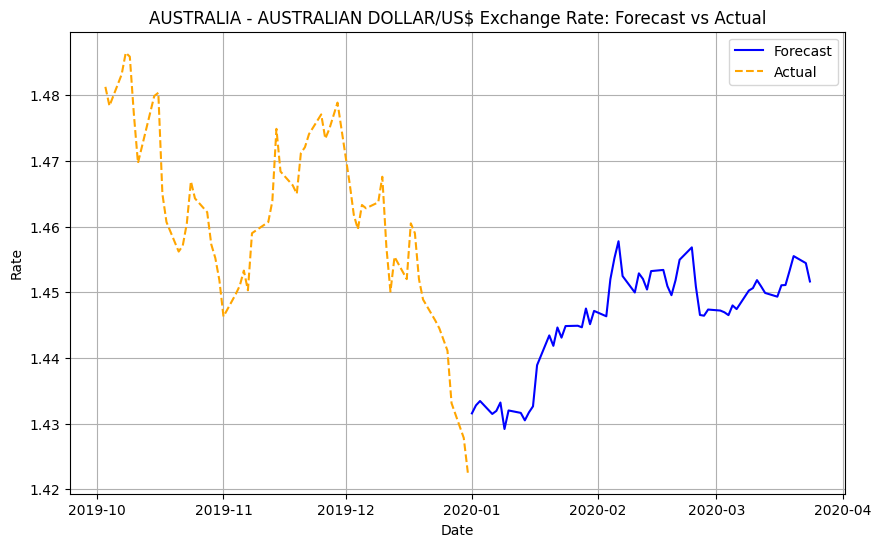

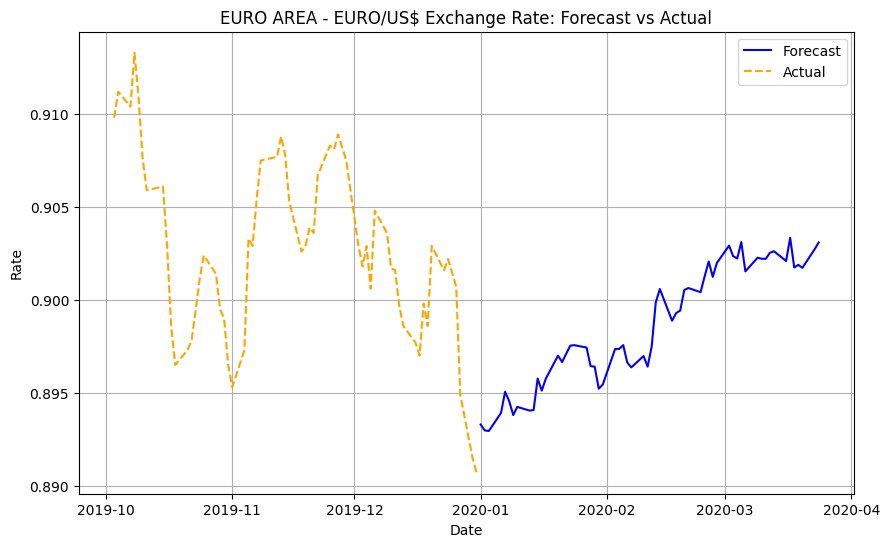

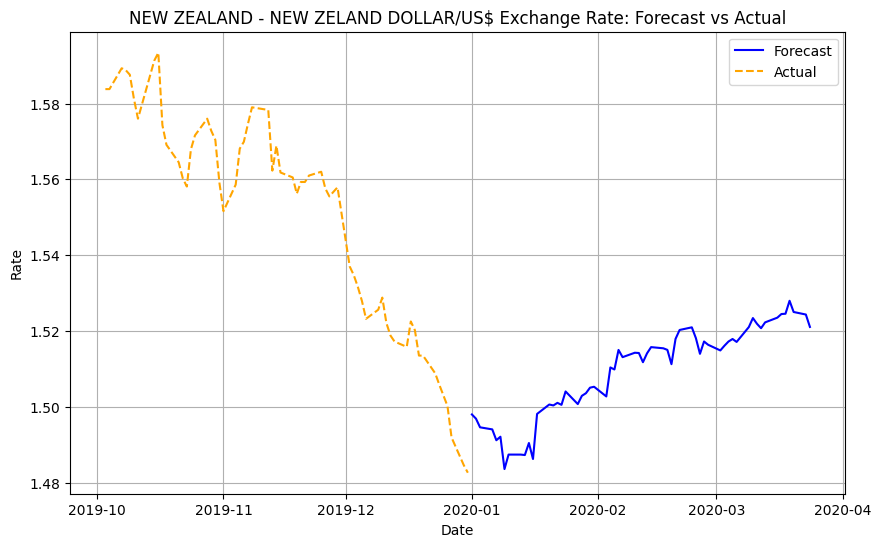

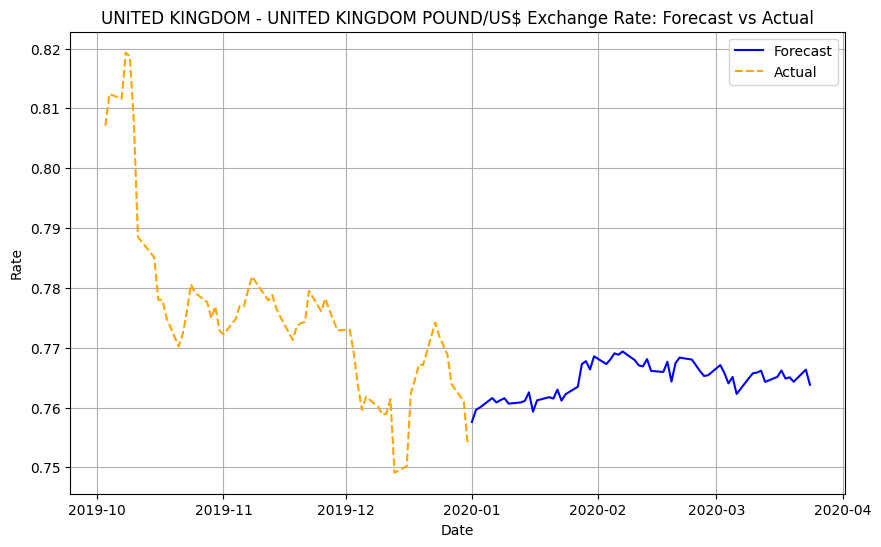

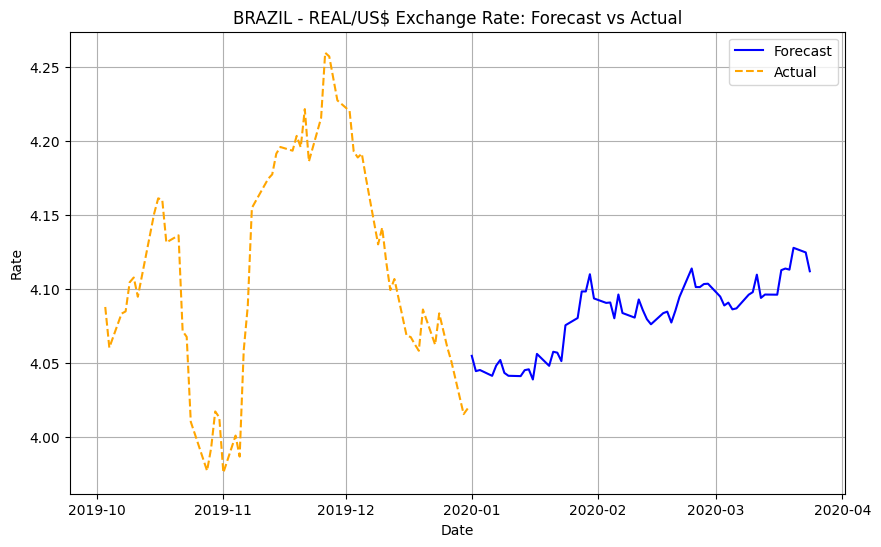

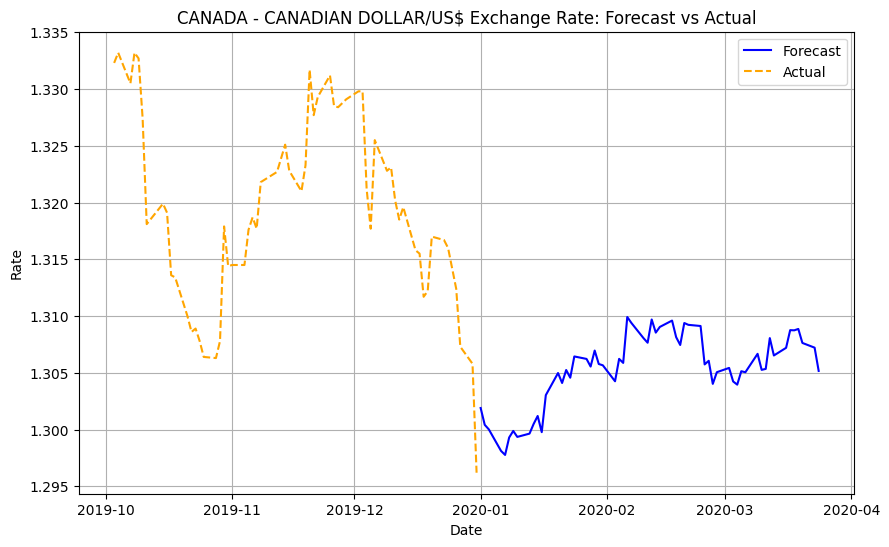

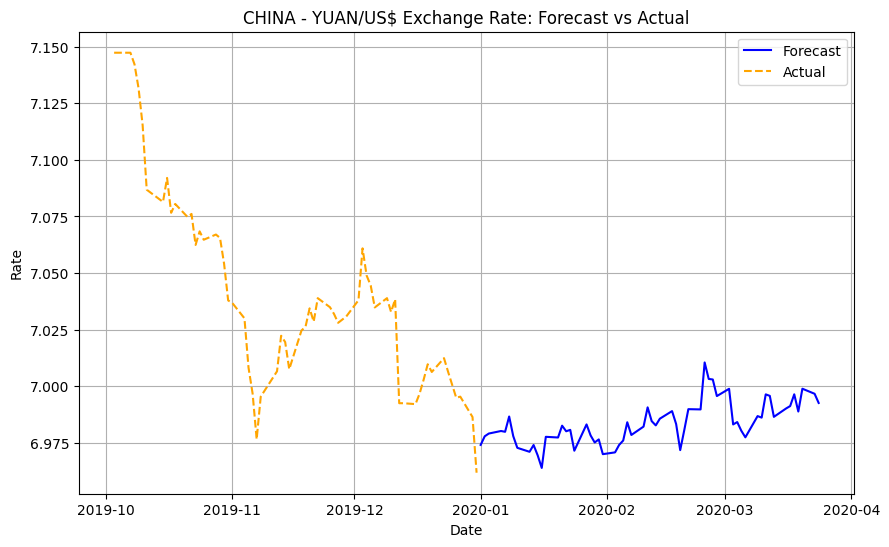

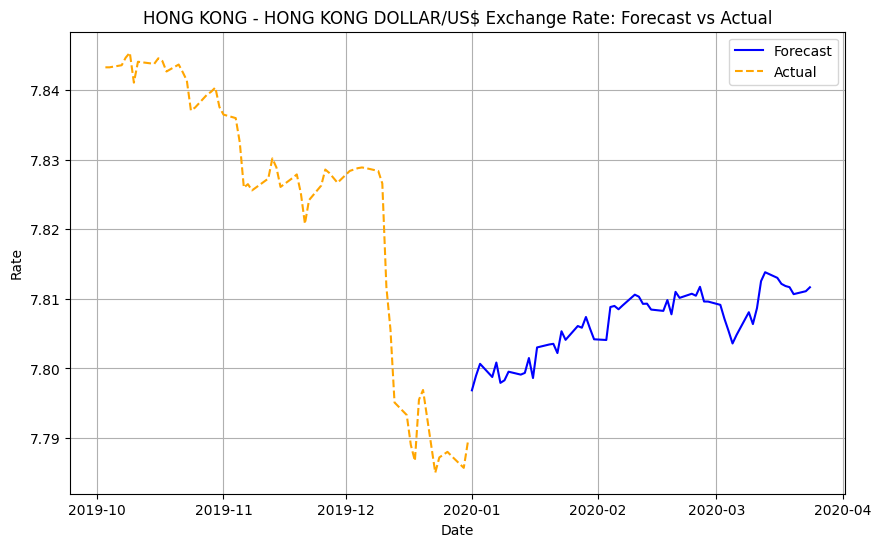

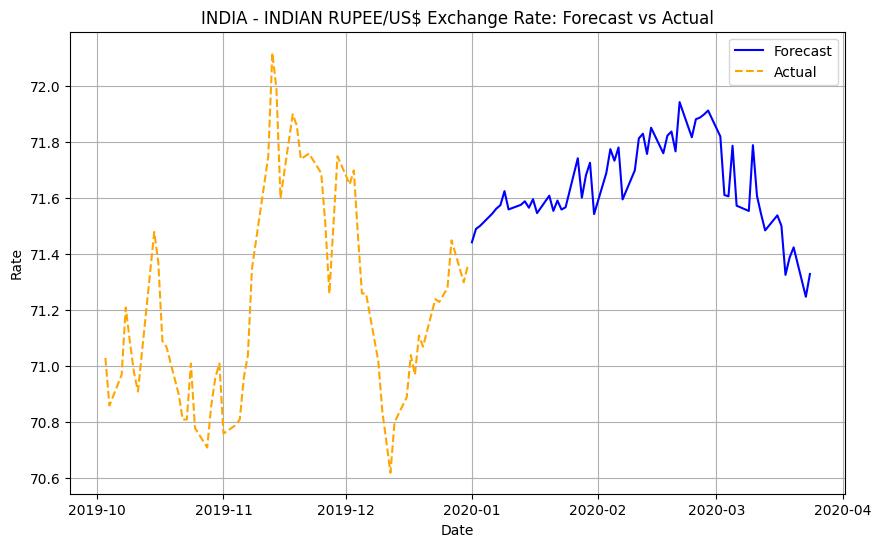

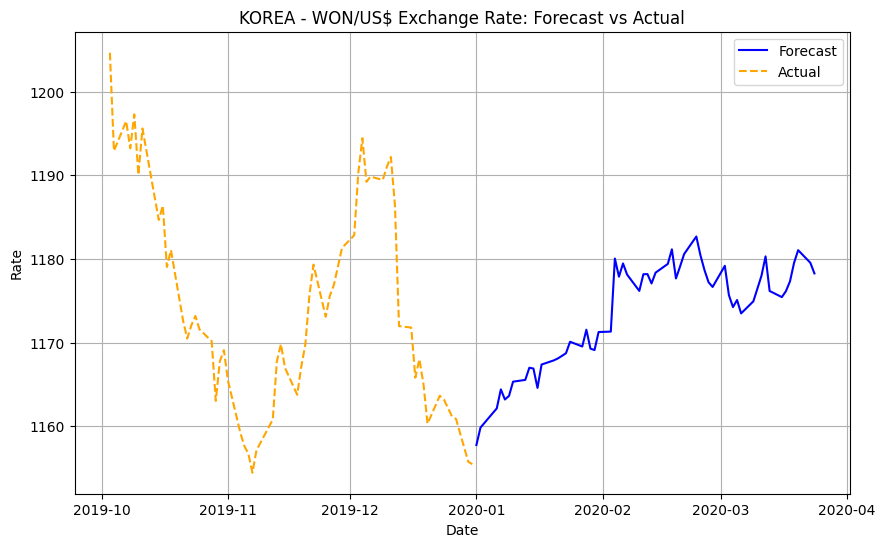

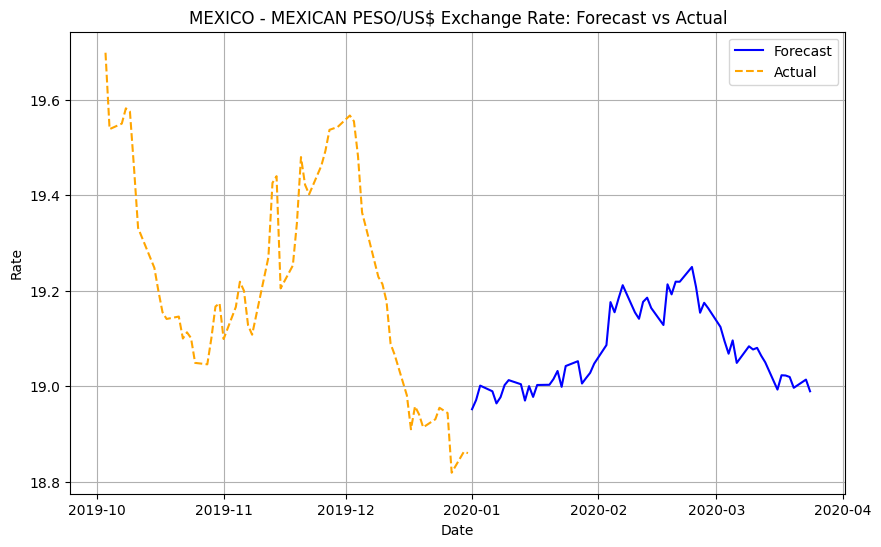

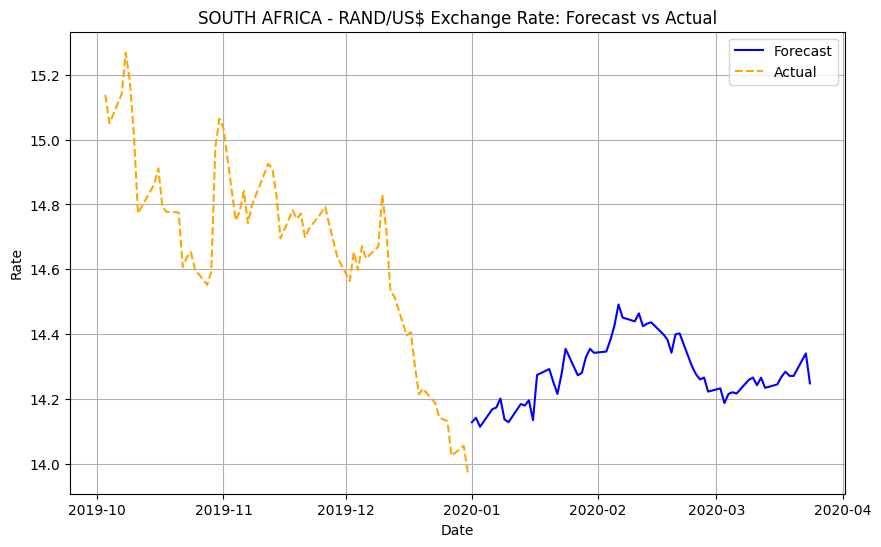

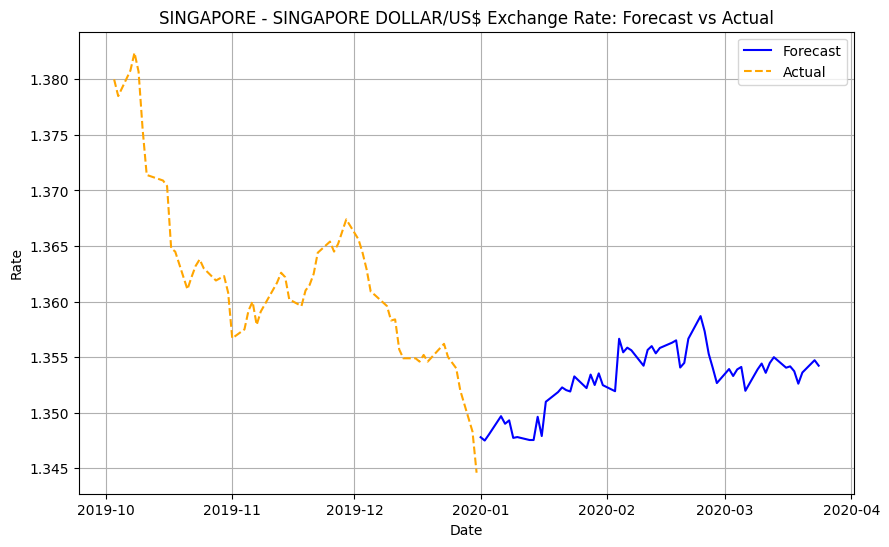

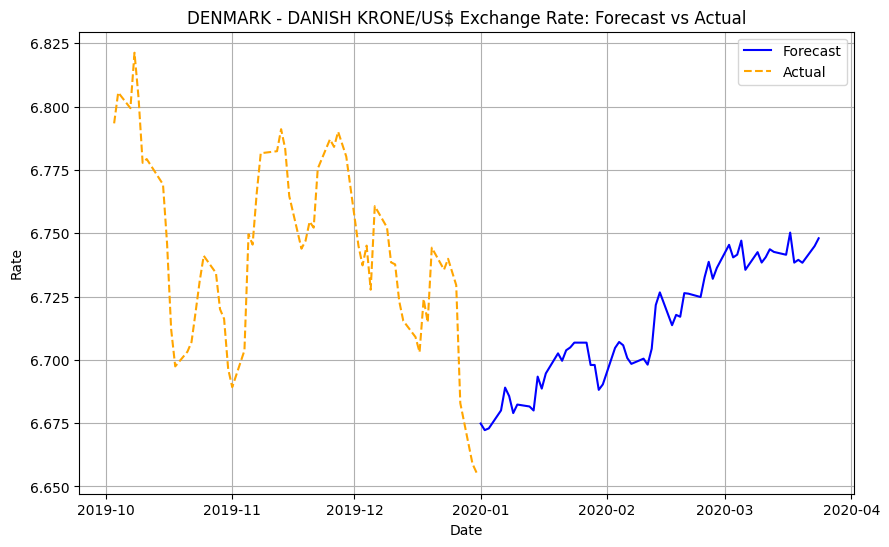

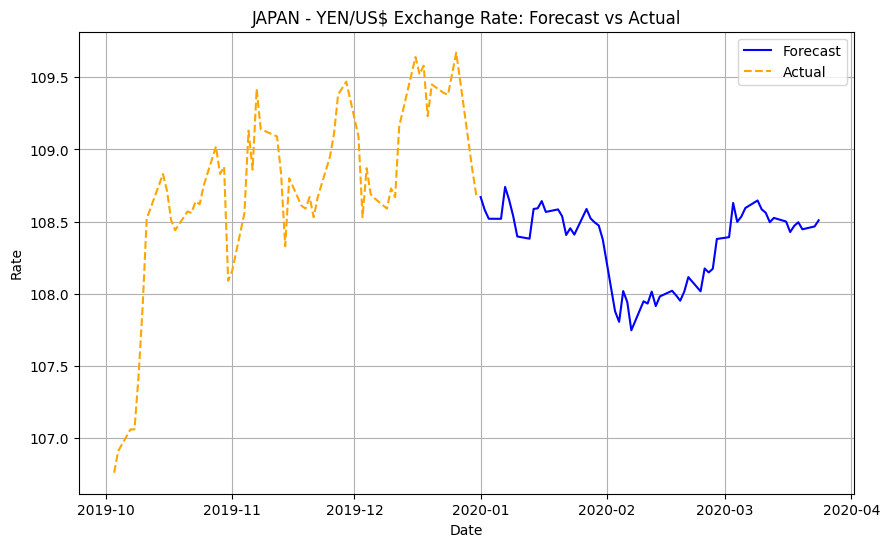

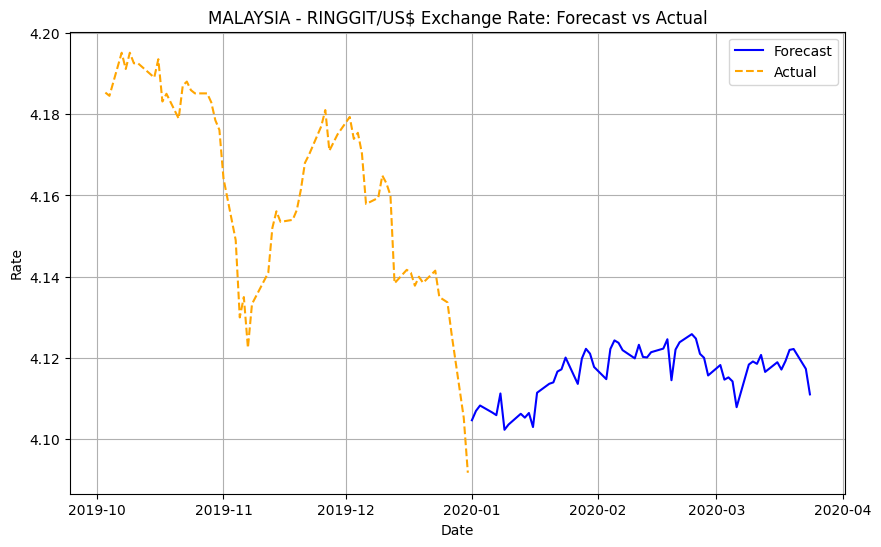

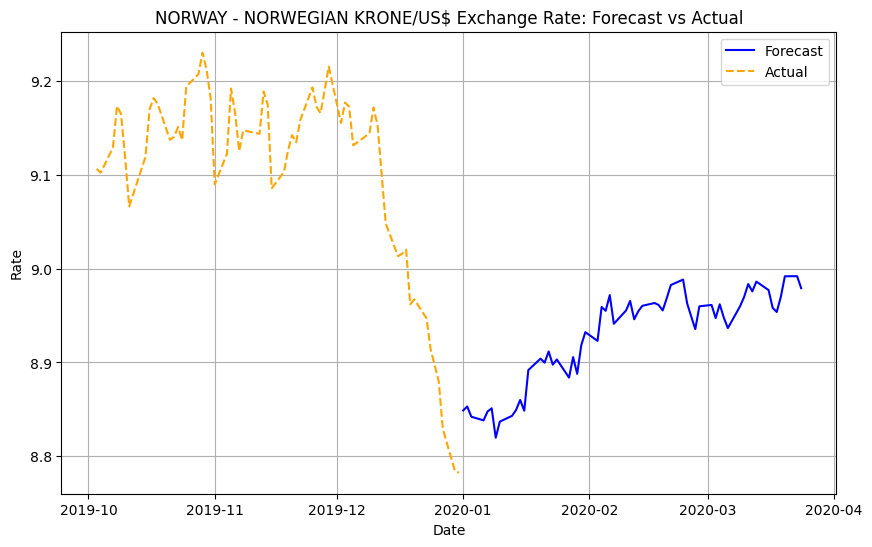

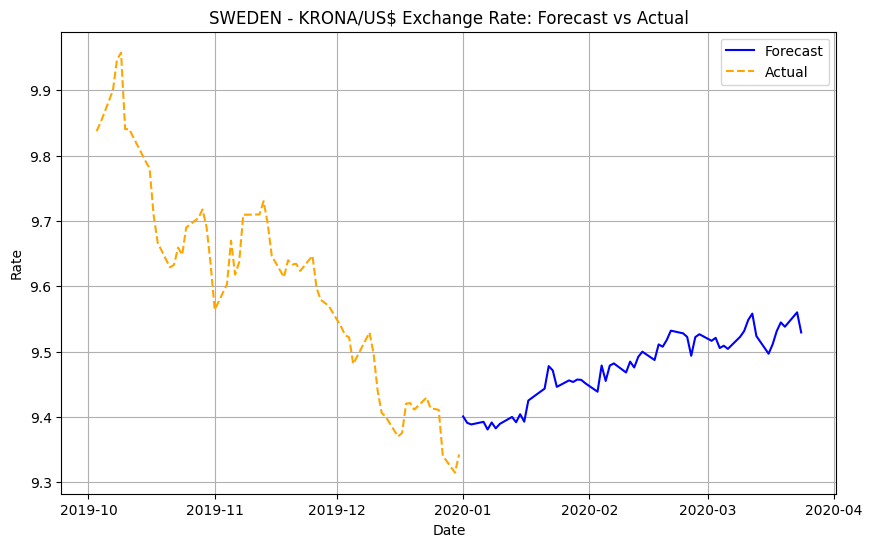

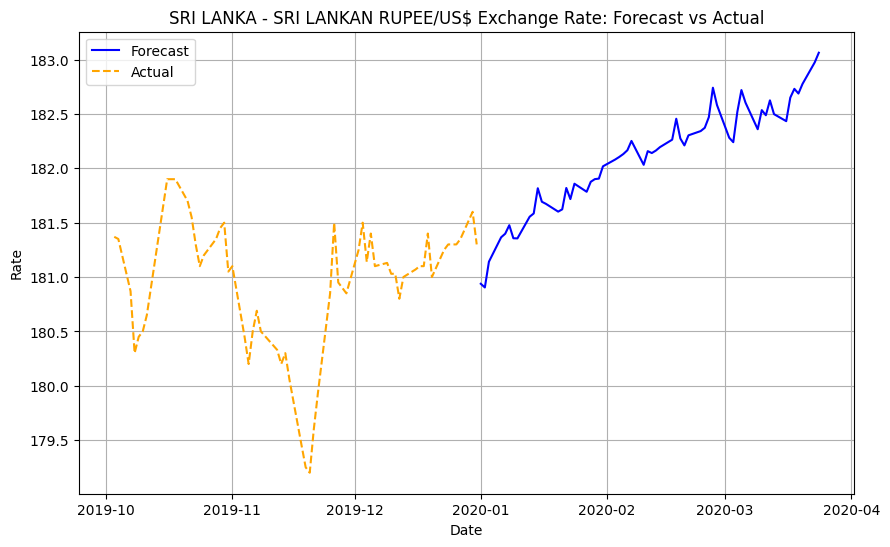

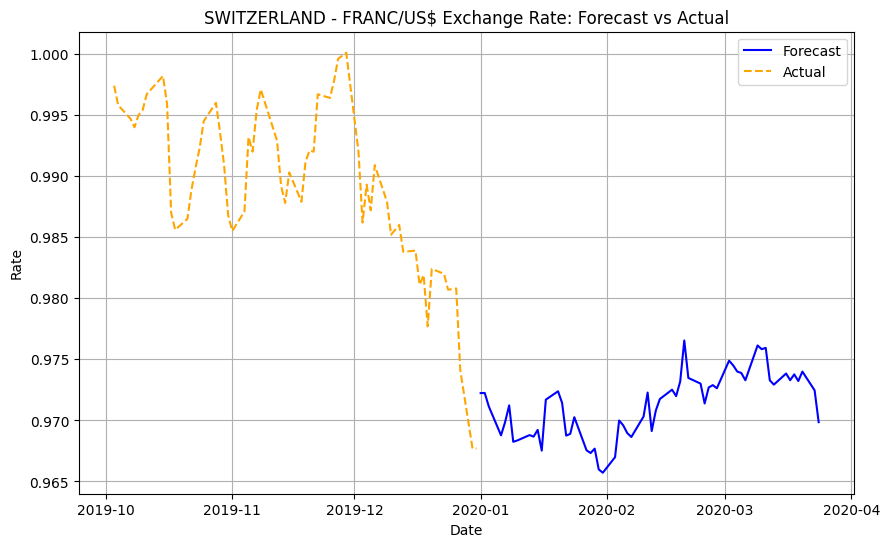

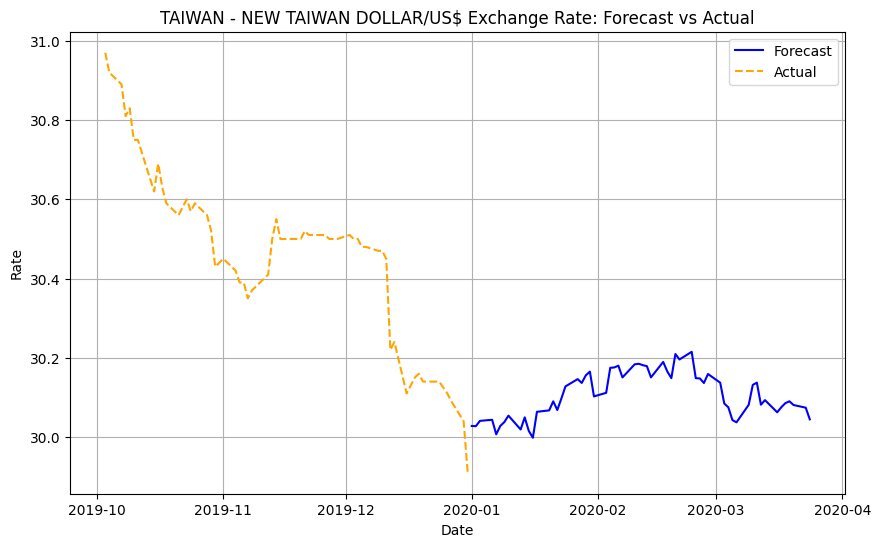

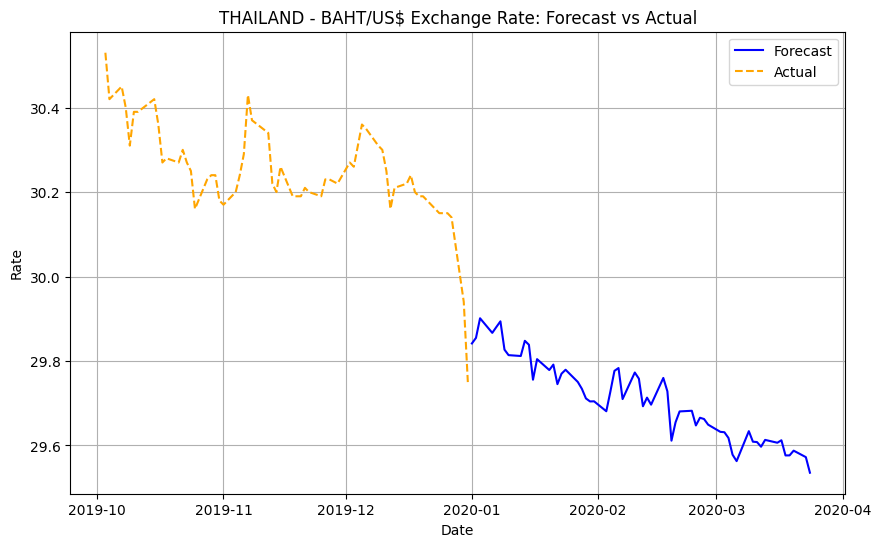

In [ ]:
for column in forecast.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(forecast.index, forecast[column], label='Forecast', color='blue')
    plt.plot(test_data.index, test_data[column], label='Actual', linestyle='--', color='orange')
    plt.title(f'{column} Exchange Rate: Forecast vs Actual')
    plt.xlabel('Date')
    plt.ylabel('Rate')
    plt.legend()
    plt.grid(True)
    plt.show()

#Save forecast to CSV
forecast.to_csv('forecast_results.csv', index=True)

In [ ]:
# Calculate metrics for each column (currency)
for column in forecast.columns:
    y_true = test_data[column].values
    y_pred = forecast[column].values

    # MAE
    mae = mean_absolute_error(y_true, y_pred)
    # RMSE
    rmse = mean_squared_error(y_true, y_pred)
    # MAPE
    mape = (abs((y_true - y_pred) / y_true)).mean() * 100

    print(f"{column}: MAE={mae:.3f}, RMSE={rmse:.3f}, MAPE={mape:.2f}%")

AUSTRALIA - AUSTRALIAN DOLLAR/US$: MAE=0.019, RMSE=0.001, MAPE=1.32%
EURO AREA - EURO/US$: MAE=0.006, RMSE=0.000, MAPE=0.67%
NEW ZEALAND - NEW ZELAND DOLLAR/US$: MAE=0.048, RMSE=0.003, MAPE=3.08%
UNITED KINGDOM - UNITED KINGDOM POUND/US$: MAE=0.014, RMSE=0.000, MAPE=1.72%
BRAZIL - REAL/US$: MAE=0.074, RMSE=0.007, MAPE=1.80%
CANADA - CANADIAN DOLLAR/US$: MAE=0.014, RMSE=0.000, MAPE=1.09%
CHINA - YUAN/US$: MAE=0.059, RMSE=0.006, MAPE=0.84%
HONG KONG - HONG KONG DOLLAR/US$: MAE=0.026, RMSE=0.001, MAPE=0.34%
INDIA - INDIAN RUPEE/US$: MAE=0.470, RMSE=0.306, MAPE=0.66%
KOREA - WON/US$: MAE=13.554, RMSE=281.819, MAPE=1.15%
MEXICO - MEXICAN PESO/US$: MAE=0.201, RMSE=0.066, MAPE=1.04%
SOUTH AFRICA - RAND/US$: MAE=0.437, RMSE=0.254, MAPE=2.95%
SINGAPORE - SINGAPORE DOLLAR/US$: MAE=0.010, RMSE=0.000, MAPE=0.72%
DENMARK - DANISH KRONE/US$: MAE=0.045, RMSE=0.003, MAPE=0.66%
JAPAN - YEN/US$: MAE=0.695, RMSE=0.707, MAPE=0.64%
MALAYSIA - RINGGIT/US$: MAE=0.047, RMSE=0.003, MAPE=1.14%
NORWAY - NORWEGIA

In [ ]:
joblib.dump(model, 'autots_model.joblib')
print("Model saved as 'autots_model.joblib'")